In [1]:
import pandas as pd 
df = pd.read_csv('london_housing.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [2]:
df.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [3]:
import pmdarima as pm

london_price = df[df.area == 'london'].average_price.to_numpy()

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(london_price[:-50], start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5,
                         seasonal = False,
                         d=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4733.548, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4738.207, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4738.771, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4736.406, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4786.851, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4732.433, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4737.609, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4731.803, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4736.075, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4733.918, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4731.622, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4730.461, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4731.259, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4731.033, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2359.231
Date:                Mon, 12 Dec 2022   AIC                           4730.461
Time:                        05:32:19   BIC                           4751.590
Sample:                             0   HQIC                          4738.965
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    663.7269    162.907      4.074      0.000     344.435     983.019
ar.L1          1.3305      0.141      9.445      0.000       1.054       1.607
ar.L2         -0.7288      0.129     -5.643      0.000      -0.982      -0.476
ma.L1         -1.3353      0.136     -9.842      0.000      -1.601      -1.069
ma.L2          0.8006      0.126      6.353      0.000       0.554       1.048
sigma2      8.523e+06      0.008   1.01e+09      0.000    8.52e+06    8.52e+06
===================================================================================
Ljung-Box (L1) (Q):                  17.37   Jarque-Bera (JB):                70.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.40   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.88e+24. Standard errors may be unstable.
"""

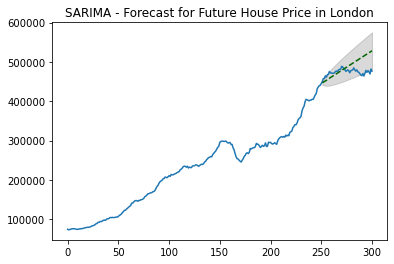

In [5]:
import matplotlib.pyplot as plt

n_periods = 50
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = [i for i in range(251, n_periods)]

# Plot
plt.plot(london_price)
plt.plot(range(251, 251 + n_periods),fitted, color='darkgreen', linestyle = '--')
plt.fill_between(range(251, 251 + n_periods), 
                 confint[:, 0],
                 confint[:, 1], 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast for Future House Price in London")
plt.show()

In [6]:
import numpy as np
model = pm.arima.ARIMA((2, 1, 2))


next_mon_pred = np.zeros(50) # array of len 50 to store next month predictions
next_mon_inter = np.zeros((50, 2))

for i in range(50):
    model.fit(london_price[:(-50 + i)])
    pred, conf_i = model.predict(n_periods = 1, return_conf_int=True)
    next_mon_pred[i] = pred[0]
    next_mon_inter[i] = conf_i[0]
    
    

In [7]:
model.fit(london_price[:(-50 + i)])
model.predict(1, return_conf_int=True)

(array([482236.52619973]), array([[475821.96747498, 488651.08492447]]))

In [8]:
london_price.size

301

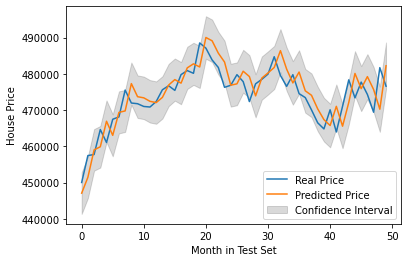

In [9]:
plt.plot(london_price[-50:], label = 'Real Price')
plt.plot(next_mon_pred, label = 'Predicted Price')
plt.fill_between( range(50), next_mon_inter[:, 0],
                 next_mon_inter[:, 1], 
                 color='k', alpha=.15, label = 'Confidence Interval')
plt.ylabel('House Price')
plt.xlabel('Month in Test Set')
plt.legend()
plt.show()